In [118]:
# from __future__ import division
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import transforms
import pandas as pd
import numpy as np
import os
import pickle
import datetime
from matplotlib import pyplot as plt
%matplotlib inline 
# import matplotlib.pyplot as plt

# from torchvision import models, transforms
# from torch.autograd import Variable

# from utils import norm_col_init, weights_init

In [3]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(12760, 2)
        
#         self.apply(weights_init)
#         relu_gain = nn.init.calculate_gain('relu')
#         self.conv1.weight.data.mul_(relu_gain)
#         self.conv2.weight.data.mul_(relu_gain)
        
#         self.train()

    def forward(self, x):
#         x = np.reshape(x, (96, 100,125))  # reshape the tensor
        x = x.view(100, 1, 96, 125)
        in_size = x.size(0)
        x1 = F.relu(self.mp(self.conv1(x)))
        x2 = F.relu(self.mp(self.conv2(x1)))
        x3 = x2.view(in_size, -1)  # flatten the tensor
        x4 = self.fc(x3)
        return F.log_softmax(x4)

In [4]:
model = Net().float()
model.load_state_dict(torch.load('CNN_Odd_dict.pkl'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [5]:
def get_features(pretrained_model, x, layers = [1,2]):
    net1 = nn.Sequential(*list(pretrained_model.children())[:layers[0]])
    out1 = net1(x) 
    net2 = nn.Sequential(*list(pretrained_model.children())[layers[0]:layers[1]])
    out2 = net2(out1)
    return out1, out2

In [6]:
data_file = 'D:/Jupyter Projects/Mid-term/sound_dataset_odd.pkl'
with open(data_file, 'rb') as f:
    dataset = pickle.load(f)

In [124]:
x = dataset[1][1]
x_arr = np.asarray([t.numpy() for t in x])
# x = [t.numpy() for t in x]
# x = x.astype(float)
# x[0]
# x = np.array(list(x[:, 1]), dtype=np.float)
# type(x)
# x = x.astype(float)
x = Variable(torch.from_numpy(x_arr[0])).view(1,1,96,125)
# torch.FloatTensor(x)
# x = Variable(torch.Tensor(x)).view(1,1,128,1)

In [127]:
output1,output2 = get_features(model,x)

In [103]:
print('output1.shape:',output1.shape)
print('output2.shape:',output2.shape)

output1.shape: torch.Size([1, 10, 94, 123])
output2.shape: torch.Size([1, 20, 92, 121])


In [135]:
output_1 = torch.squeeze(output1,dim = 0)
output_2 = torch.squeeze(output2,dim = 0)

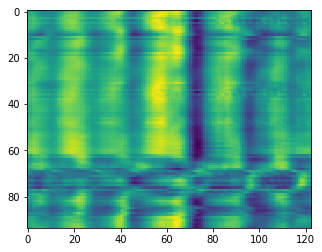

In [140]:
output_1_arr = output_1.data.numpy()
plt.imshow(output_1_arr[1], interpolation='nearest')
plt.show()

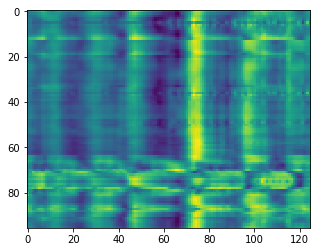

<Figure size 432x288 with 0 Axes>

In [151]:
# output_1_arr = output_1.data.numpy()
plt.imshow(x_arr[0], interpolation='nearest')
plt.show()
plt.savefig('test.png')

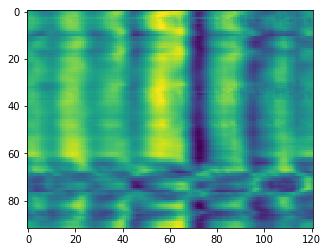

In [139]:
output_2_arr = output_2.data.numpy()
plt.imshow(output_2_arr[0], interpolation='nearest')
plt.show()


In [141]:
from PIL import Image

In [148]:
A = x_arr[0]
im = Image.fromarray(A)
img_gray = im.convert('L')
img_gray.save("test.jpg")

In [145]:
import scipy.misc

In [146]:
misc.imsave('test.jpg', x_arr[0])

NameError: name 'misc' is not defined